## 가중치 초기화(Weight initialization)
### 세이비어 초기화(Xavier Initialization) = 글로럿 초기화(Glorot Initialization)
- 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세우는 방식이다.<br>

- 초기값을 0으로 설정하는 방법도 있을 테지만 실제로 학습이 올바로 이루어지지 않는다. 따라서 초기값을 무작위로 설정해야하는데 방법이 여러가지가 존재한다.

- S자 형태인 활성화 함수와 함께 사용시에 좋은 성능을 보이지만, ReLU와 함게 사용시에 성능이 좋지 않다. 즉 다른 초기화 방법 사용해야함.
- 균등, 정규 분포 2가지의 방법이 존재한다.

- 균등 분포
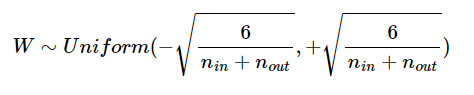

- 정규분포
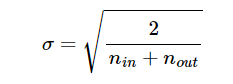

### He 초기화
- 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두가지 경우로 나뉜다.
- 하지만 He 초기화는 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반여하지 않는다.

- 균등 분포
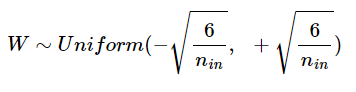

- 정규 분포
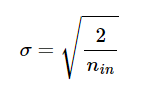

- 시그모이드나 하이퍼볼릭탄젠트 같은 S형 함수들은 세이비어 초기화 방법이 효율적이다.
- ReLU 계열 함수를 사용할 경우에는 He 방법이 효율적이다.
- 보통은 ReLU + He 초기화 방법이 좀 더 보편적입니다.

### 배치 정규화
 - 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.

#### 내부 공변량 변화(Internal Covariate Shift)
- 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상
- 공변량 변화는 훈련 데이터의 분포와 테스터 데이터의 분포가 다른 경우
- 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화

#### 배치 정규화(Batch Normalization)
- 한 번에 들어오는 배치 단위로 정규화 한다.
- 입력에 대한 평균을 0으로 만들고, 정규화를 한다. 이 후 데이터에 대해 스케일과 시피트를 수행한다.

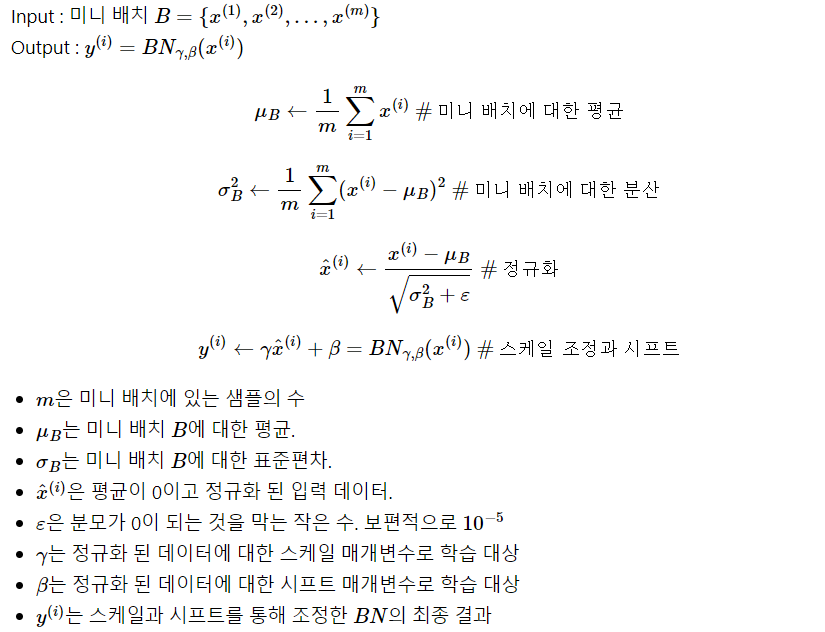

배치 정규화는 학습시 배치 단위의 평균과 분산을 차례대로 받아 이동 평균과 이동 분산으로 저장후 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고, 구해놓은 평균과 분산으로 정규화를 한다.

#### 배치 정규화의 장점
- 시그모이드나 하이퍼볼릭탄젠트를 사용하더라도 기울기 소실 문제가 크개 개선됨
- 가중치 초기화에 훨씬 덜 민감해진다.
- 큰 학습률을 사용할 수 있어 속도 개선 가능
- 미니 배치 단위의 평균, 분산이 노이즈 효과를 주어 과적합을 방지한다. 하지만 부수적 효과이므로 드롭아웃과 함께 사용하는것이 좋다.

#### 배치 정규화의 단점
- 미니 배치 크기에 의존적이다. 배치크기가 1인 경우 분산이 0이 된다. 즉 어느 정도 크기의 미니 배치에서 효과가 있다.
- RNN에 적용하기 어렵다.층마다 다른 통계치를 가지므로 적용이 어렵, 층 정규화를 주로 사용해야함.
- 계산량이 많아서 서비스 속도 관점에서는 적용하기 어렵다.

#### 층 정규화(layer Normalization)
- 배치 정규화
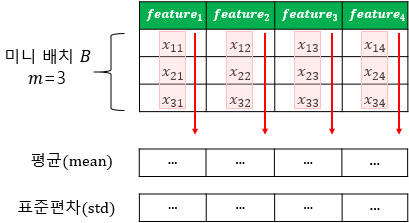
- 층 정규화
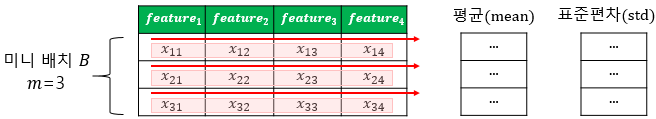

## 합성곱 신경망(Convolutional Neural Network

#### 합성곱 신경망의 대두
- 이미지라는 것은 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 하는 다양한 변향이 존해하고 다층 퍼셉트론으로는 몇가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다는 단점이 있다. 이를 공간적인 구조 정보를 보존하면서 학습할수 있는 방법이 합성곱 산경망이다.

#### 채널
- 이미지는 (높이, 너비,채널)이라는 3차원 텐서입니다. 높이는 이미지의 세로 방향 픽셀 수, 너비는 이미지의 가로 방향 픽셀 수, 채널은 색 성분을 의미합니다.
- 흑백은 채널이 1, 칼러는 적색, 녹색, 청색 채널 수가 3개입니다.
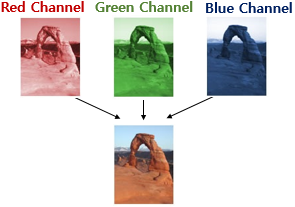
- 채널은 때로는 깊이라고도 하고 이 경우 이미지는 (높이, 너비, 깊이)라는 3차원 텐서로 표현된다.

#### 합성곱 연산(Convolution operation)
- 합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역활
- n * m 행렬을 커널 또는 필터라 부르고 일반적으로 3 * 3, 5 * 5 를 사용한다.
<br>

- 컨볼루션 연산 예시
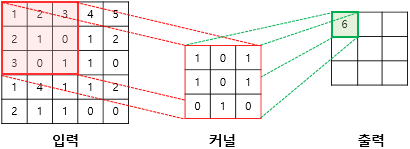
- 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 특성 맵이라고 한다.<br>
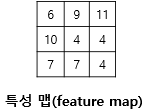
- 위의 예제에서는 커널의 크기가 3 * 3이었지만, 커널의 크기는 사용자가 지정가능하다, 또한 이러한 이동 범위를 스트라이드(stride)라고 합니다.

#### 패딩(Paddong)
- 대부분의 합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특징이 있습니다.
- 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지하고 싶다면 패딩(padding)을 사용하면 됩니다.<br>
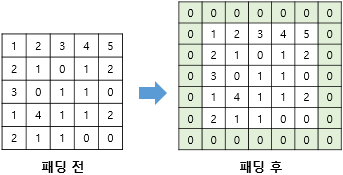

#### 가중치와 편향
- 사실 합성곱 신경망에서 가중치는 커널 행렬의 원소들입니다.<br>
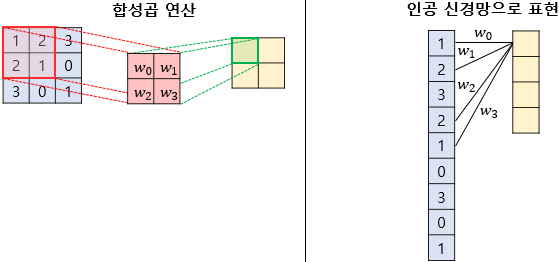
- 이미지 전체를 훑으면서 사용되는 가중치는 4개 뿐이고 이는 다층 퍼셉트론을 사용할 때마다 훨씬 적은 수의 가중치를 사용하며, 공간적 구조 정보를 보존한다는 특징이 있다.
- 합성곱 연산을 통해 얻은 특성 맵은 비선형성을 추가를 위해서 활성화 함수를 지니게 됩니다. 이 때 렐루 함수의 변형들이 주로 사용됩니다.
- 합성곱 신경망에도 편향을 추가할수 있으며, 하나의 값만을 가지고 커널이 저거용된 결과의 모든 원소에 더해집니다.<br>
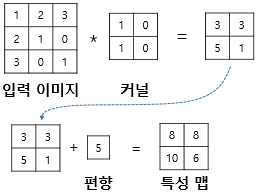

#### 3차원 텐서의 합성곱 연산<br>
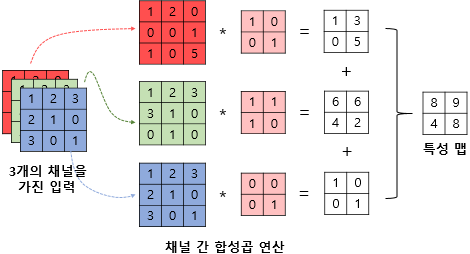
- 커널의 각 채널끼리의 크기는 같아야 한다.
- 주의할점은 위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널이라는 점입니다.(그림에서는 표현x)
- 또한 합성곱 연산의 결과로 얻은 특성 맵의 채널 차원은 컬러의 의미를 담고 있지는 않다.

#### 3차원 텐서의 합성곱 연산 일반화
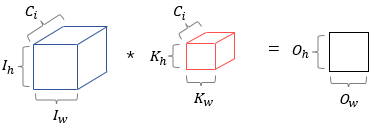
- 여기서 다수의 커널을 사용할 경우, 사용한 커널의 수만큼 특성맵의 채널 수가 된다.<br>
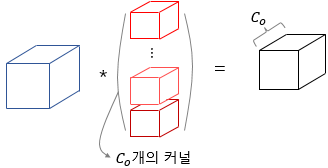
- 채널수 : ci, 특성 맵의 채널 수 c0
- 이를 바탕으로 가중치 매개변수의 총 수를 구해보자면 우선 하나의 커널에 하나의 채널 할당된 매개변수는 ki * k0개입니다. 합성곱 연산을 위해 입력 데이터의 채널 수와 동일한 채널 수를 가져야 하므로, 하나의 커널은 ki * k0 * ci임을 알 수 있고 이러한 커널이 총 c0개가 있어야 한다.
- 가중치 매개변수의 총 수 : ki * k0 * ci * c0

## CNN으로 MNIST 분류하기

In [8]:
import torch
import torch.nn as nn

In [9]:
#data
# 배치 크기 × 채널 × 높이(height) × 너비(widht)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 1, 28, 28)
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


#### 합성곱층과 풀링 선언하기

In [11]:
conv1 = nn.Conv2d(1, 32, 3, padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [12]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [13]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


#### 구현체를 연결하여 모델 만들기

In [16]:
#채널 수가 1에서 32로 증가됨을 확인할 수 있음.
#크기 보존의 이유는 패딩을 1폭으로 하고 3 * 3커널을 사용하기 때문이다.
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [17]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [18]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [19]:
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [20]:
#out.size()을 통해 특정 차원 출력 가능
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼친다.
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


In [23]:
#전결합층(Fully-Connected-layer)을 통과
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 3136x10)